In [49]:
import pandas as pd

<h6> <p style="color:blue;"> We will now set up to see if it is 'list like'
Objects that are considered list-like are for example Python lists, tuples, sets, NumPy arrays, and Pandas Series.
this is prefered when we are going to use the pandas datareader which will set us up with a pandas series </h6>

Here is our S&P500 data
              sp500
DATE               
2010-11-22  1197.84
2010-11-23  1180.73
2010-11-24  1198.35
2010-11-25      NaN
2010-11-26  1189.40
...             ...
2020-11-12  3537.01
2020-11-13  3585.15
2020-11-16  3626.91
2020-11-17  3609.53
2020-11-18  3567.79

[2608 rows x 1 columns]


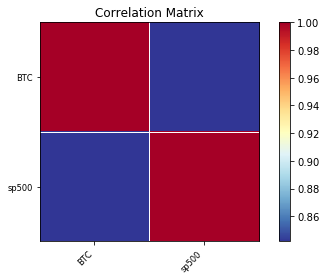

In [47]:
pd.core.common.is_list_like = pd.api.types.is_list_like

# use the datareader to extract data from Internet sources into a pandas DataFrame
# you will probably need to: pip install pandas_datareader

import pandas_datareader.data as web

# lets set up our data periods: S&P500 stock prices for the last ten years.: 11/18/2010 thru 11/18/2020
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

import datetime
start = datetime.datetime(2010, 11, 18)
end = datetime.datetime(2020, 11, 18)


# we're going to use FRED: Federal Reserve Economic Data, utilizing datareader
# https://pydata.github.io/pandas-datareader/stable/remote_data.html#remote-data-fred
# get the data in a Pandas Series that we call SP500 by using web.DataReader and 
# specifying the series name (i.e. sp500) and the provider (i.e. fred)

SP500 = web.DataReader(['sp500'], 'fred', start, end)
print(f"Here is our S&P500 data")
print (SP500)

# lets use another cool library to support our call out to get data
# 'requests' is the de facto standard for making HTTP requests in Python. 
# It abstracts the complexities of making requests behind a beautiful,
# simple API so that you can focus on interacting with services and consuming data in your application

# retrieve BTC pricing : https://financialmodelingprep.com/developer/docs/cryptocurrency-historical-data-api/

import requests
BTCUSD = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/crypto/BTCUSD?apikey=a600e12583504fce5b19ef091e7cff6f')


# you’ll see that it is actually serialized JSON content. 

BTCUSD = BTCUSD.json()
BTCUSD = BTCUSD['historical']

# if we were to print(BTCUSD) , itll show the list of dictionaries. 
#  each element in the list is a different day containing Bitcoin prices. 
# BTC prices are stored under the key close.

BTC = pd.DataFrame.from_dict(BTCUSD)
BTC.set_index('date',inplace=True)
BTC = BTC[['close']]
BTC.columns = ['BTC']
SP500BTC = BTC.merge(SP500,how='inner',right_index = True, left_index=True)
SP500BTC.dropna(inplace=True)
correlation = SP500BTC.corr()
correlation
# print(f" this is our correlation")
# dont need ?
from statsmodels import api as sm
import matplotlib.pyplot as plt
# print graph 
sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
plt.show()
# end print
#statistically significant?
# from scipy.stats import linregress
# linregress(SP500BTC['sp500'],SP500BTC['BTC'])
# use command / to select a bunch of stuff to make comments